# Silver as a techno/biophysical constraint for a large-scale development of Solar Photovoltaics? Current trends and data quality


We present in this notebook the code and the rationale behind the example on silver developed

In [1]:
import numpy as np
import chaospy as cp
import matplotlib.pyplot as plt

The distributions of the four quantities whose trends to the year 2050 are modelled are firstly defined. 10,000 (100,000) quasi-random Sobol distributions are supposed on the basis of the technical coefficients available or provided. 
i) As regards silver-paste use, a distribution is generated on the basis of the suggestions provided by the pool of experts. A normal distribution is supposed.

In [3]:
# Current use of silver paste (mg/cell) - year 2015

ITRPV2016silverCell2015 = 110
ITRPVsilverCell2026 = 40 
ITRPV2016decreasePace= - 1/(2026-2015) * np.log(ITRPVsilverCell2026/ITRPV2016silverCell2015)

silverCell2050a= 110 * 0.01
silverCell2050aDecreasePace= - 1/(2050-2015) * np.log(silverCell2050a/ITRPV2016silverCell2015)

silverCell2050b = 10
silverCell2050bDecreasePace= - 1/(2050-2015) * np.log(silverCell2050b/ITRPV2016silverCell2015)

silverCell2050c = 20
silverCell2050cDecreasePace= - 1/(2050-2015) * np.log(silverCell2050c/ITRPV2016silverCell2015)

silverCell2050dDecreasePace = (silverCell2050cDecreasePace + silverCell2050bDecreasePace)/2

silverCell2050eDecreasePace = 0.05

silverCell2050DecreasePace = [ITRPV2016decreasePace, ITRPV2016decreasePace, silverCell2050aDecreasePace, silverCell2050aDecreasePace, silverCell2050bDecreasePace,silverCell2050cDecreasePace,silverCell2050dDecreasePace, silverCell2050eDecreasePace]

mu = np.mean(silverCell2050DecreasePace)
sigma = np.std(silverCell2050DecreasePace)
lower= 0

distribution = cp.truncnorm(0, np.inf, mu, sigma)
silverCellDistribution = distribution.sample(100000, rule="S")
np.random.shuffle(silverCellDistribution)

distributionB = cp.truncnorm(0, np.inf, mu, sigma)
silverCellDistributionB = distributionB.sample(100000, rule="S")
np.random.shuffle(silverCellDistributionB)

The trend of solar-PV efficiency increased is acknowledged up to the year 2050. A constant pace is also supposed in this case

In [4]:
# PV Cell Efficiency growth up to the year 2050 (W/cell)

PVCellEfficiency2015 = 4.27

PVCellEfficiency2050 = 6.1

PVCellEfficiencyIncreasePace = 0.10

ii) A similar exercise is repeated for the PV power capacity installed up to the year 2050 (on the basis of energy-scenario experts' suggestions received)

In [5]:
# Current expansion of PV power capacity (GW) - year 2015

PVPC2015 = 45
CrystallineSiliconShare = 0.9
IEA2050 = 4670
IEA2050_CrystallineSiliconShare = IEA2050 * CrystallineSiliconShare
Greenpeace2050 = 9295
Greenpeace2050_CrystallineSiliconShare = Greenpeace2050 * CrystallineSiliconShare
Fraunhofer2050 = 30700
Fraunhofer2050_CrystallineSiliconShare = Fraunhofer2050 * CrystallineSiliconShare

PVPC2050IncreasePace = [0.046, 0.122, 0.077]

avgPVPC = np.mean(PVPC2050IncreasePace)
stdPVPC = np.std(PVPC2050IncreasePace)
lower= 0

distribution1 = cp.truncnorm(0, np.inf, avgPVPC, stdPVPC)
PVPC2050IncreasePaceDistribution = distribution1.sample(100000, rule="S")
np.random.shuffle(PVPC2050IncreasePaceDistribution)

distribution1B = cp.truncnorm(0, np.inf, avgPVPC, stdPVPC)
PVPC2050IncreasePaceDistributionB = distribution1B.sample(100000, rule="S")
np.random.shuffle(PVPC2050IncreasePaceDistributionB)


Finally, the reduction in other industrial uses and the increment in non-industrial uses are acknowledged through the generation of uniform distributions.

In [6]:
# Reduction in other industrial applications

silverOtherIndustrial2015 = 15.9

distributionSilverOtherIndustrial = cp.Uniform(-0.05, -0.03)
distributionSilverOtherIndustrialPace = distributionSilverOtherIndustrial.sample(100000, rule="S")
np.random.shuffle(distributionSilverOtherIndustrialPace)

distributionSilverOtherIndustrialB = cp.Uniform(-0.05, -0.03)
distributionSilverOtherIndustrialPaceB = distributionSilverOtherIndustrialB.sample(100000, rule="S")
np.random.shuffle(distributionSilverOtherIndustrialPaceB)

# Increase in non-industrial applications

distributionSilverNonIndustrial = cp.Uniform(0.01, 0.03)
distributionSilverNonIndustrialPace = distributionSilverNonIndustrial.sample(100000, rule="S")
np.random.shuffle(distributionSilverNonIndustrialPace)

distributionSilverNonIndustrialB = cp.Uniform(0.01, 0.03)
distributionSilverNonIndustrialPaceB = distributionSilverNonIndustrialB.sample(100000, rule="S")
np.random.shuffle(distributionSilverNonIndustrialPaceB)

silverNonIndustrial2015 = 18.1

year = np.arange(2015,2051)
yearBase = 2015
relativeYear = np.subtract(year,yearBase)

In order to appreciate whether we are going to clash against any biophysical constraint, a distribution of the natural available silver is supposed within the range of estimated ultimate recoverable resources (USGS estimate, the most conservative) and the overall resources ideally available.

In [7]:
# Resources and reserves

distributionSilverRR = cp.Uniform(570, 4000)
distributionSilverReserveResource = distributionSilverRR.sample(10000, rule="S")
np.random.shuffle(distributionSilverReserveResource)
SilverRRMean = np.mean(distributionSilverReserveResource)

The distributions of the yearly and cumulative trends in silver demand are eventually generated (demand side)

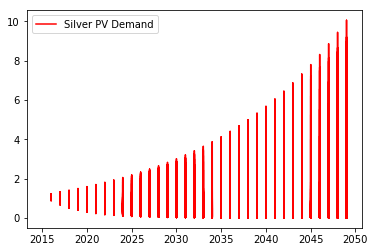

ValueError: operands could not be broadcast together with shapes (100000,) (10000,) 

In [8]:
# Generation of the yearly silver output (1,000 metric tonnes)

for i in range(0,35):
    PVDemand = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000
    plt.plot(len(PVDemand) * [i+2015], PVDemand, c = 'r', label = 'Silver PV Demand' if i == 0 else "")
plt.legend()
plt.show()

# Generation of the cumulative silver output (1,000 metric tonnes)

CumulativeSilver_array = np.empty((0, 10000))
CumulativeSilver = np.zeros(10000)
for i in range(0,36):
    yearlySilver = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPace*i)
    CumulativeSilver = yearlySilver + CumulativeSilver
    CumulativeSilver_array = np.append(CumulativeSilver_array, [CumulativeSilver], axis=0)
    CumulativeMean = np.mean(CumulativeSilver_array, axis=1)
    plt.scatter([i+2015], CumulativeMean[i], c = 'b', label = 'Cumulative Silver demand mean' if i == 0 else "")
    plt.plot(len(CumulativeSilver) * [i+2015], CumulativeSilver_array[i], c = 'r', label = 'Cumulative Silver demand' if i == 0 else "")
plt.legend()
plt.show()

In order to evaluate whether the year-over-year trends, the time derivative of the yearly demand is computed

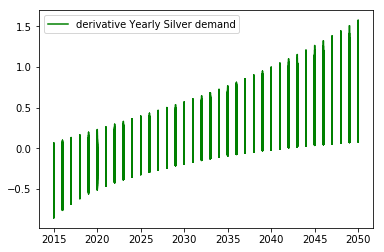

In [9]:
# Derivative Yearly Silver Demand

for i in range(0,36):
    derivativeYearlySilver = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)*(PVPC2050IncreasePaceDistribution - silverCellDistribution - PVCellEfficiencyIncreasePace)/1000 + silverOtherIndustrial2015 * distributionSilverOtherIndustrialPace * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * distributionSilverNonIndustrialPace * np.exp(distributionSilverNonIndustrialPace*i)
    plt.plot(len(derivativeYearlySilver) * [i+2015], derivativeYearlySilver, c = 'g', label = 'derivative Yearly Silver demand' if i == 0 else "")
plt.legend()
plt.show()

It is possible to estimate the presence of a (economic/technological) constraint by comparing the yearly demand trend with the yearly extraction capacity from the industry. The latter is modelled by assuming a 2.3% y-o-y increase in line with the global trend observed after World War II.

In [10]:
# Yearly Delta (viability, technological constraint)

for i in range(0,36):
    yearlySilver = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPace*i)
    silverExtraction = 27.6 * np.exp(0.226*i)
    silverDelta = np.subtract(silverExtraction, yearlySilver)
    plt.scatter([i+2015], silverDelta[i], c = 'p')
plt.show()

ValueError: Invalid RGBA argument: 'p'

The potentially more severe constraint, i.e. the biophysical one, is checked by subtracting the projected cumulative trend from the estimates of the overall available natural budget of silver.

In [11]:
# Cumulative Delta (feasibility, biophysical constraint)

Difference_array = np.empty((0, 10000))
CumulativeSilver = np.zeros(10000)
for i in range(0,36):
    yearlySilver = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPace*i)
    CumulativeSilver = yearlySilver + CumulativeSilver
    Difference = np.subtract(distributionSilverReserveResource, CumulativeSilver)
    Difference_array = np.append(Difference_array, [Difference], axis=0)
    DifferenceMean = np.mean(Difference_array, axis=1)
    plt.scatter([i+2015], DifferenceMean[i], c = 'y', label = 'Difference mean' if i == 0 else "")
    plt.plot(len(Difference) * [i+2015], Difference_array[i], c = 'b', label = 'Difference' if i == 0 else "")
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (100000,) (10000,) 

The influence of the uncertainty of the four independent variables (pace of decrease in silver use for PV cells contact metallization, pace of increase in PV power capacity deployment, pace of decrease in other-industrial applications and pace of increase in non-industrial applications) on the output uncertainty is evaluated through a scatter plot. The variables presenting a trend are those whose uncertainty is affecting the output the most. Conversely, the variables presenting a complete random pattern of scatter dots are the least important ones.

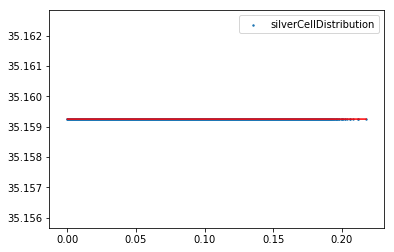

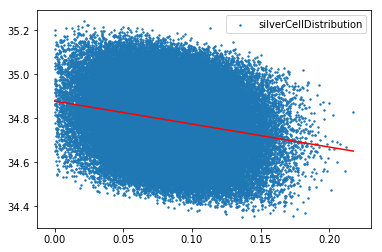

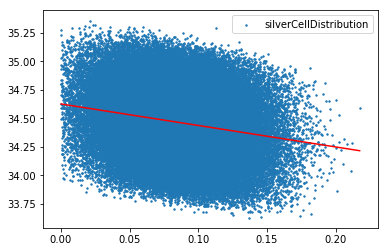

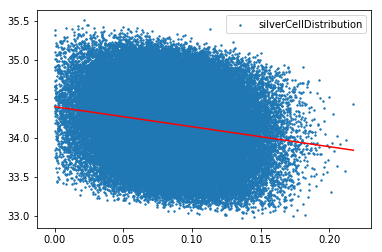

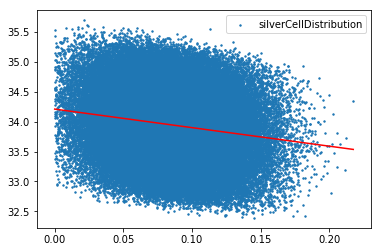

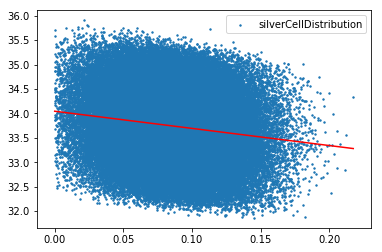

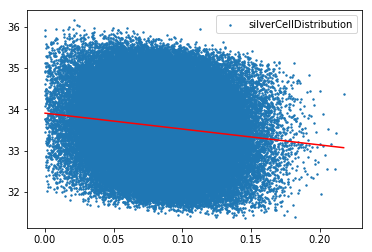

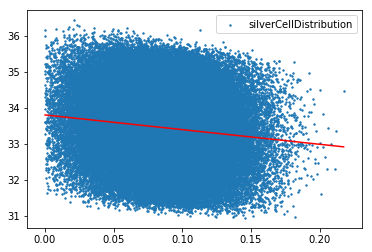

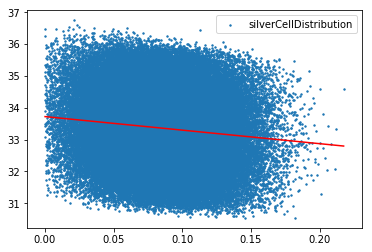

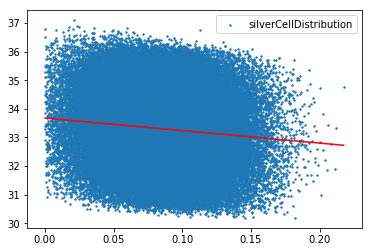

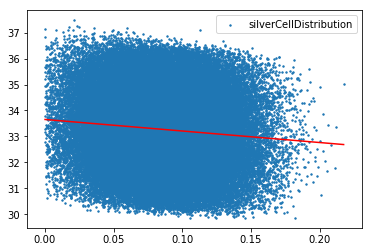

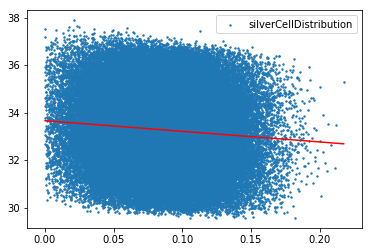

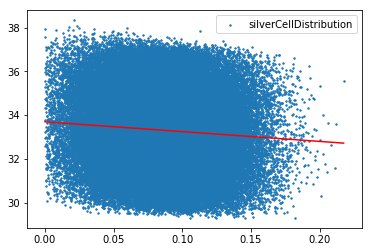

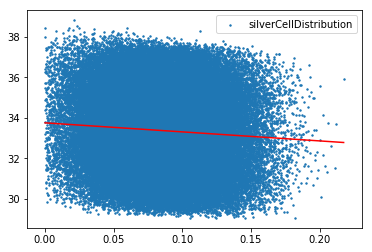

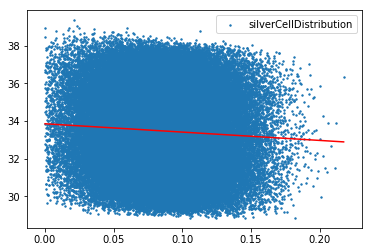

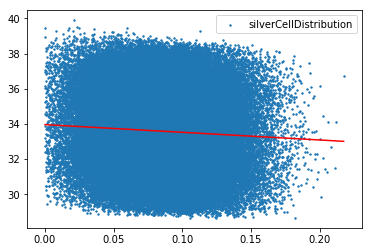

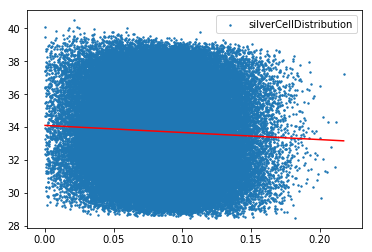

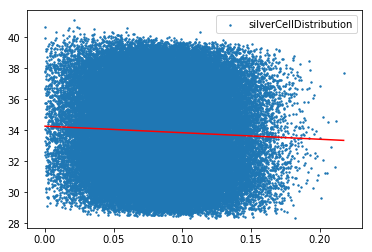

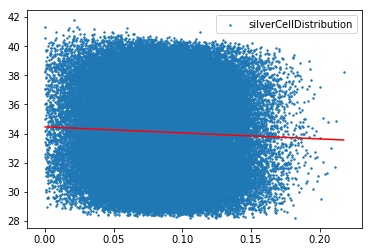

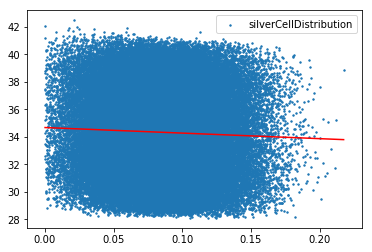

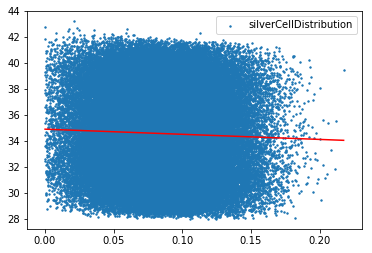

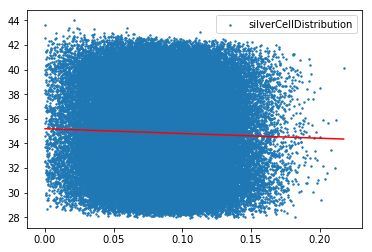

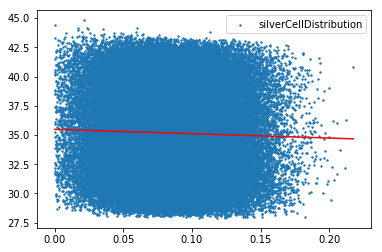

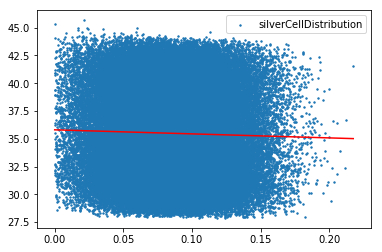

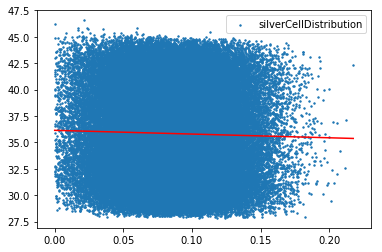

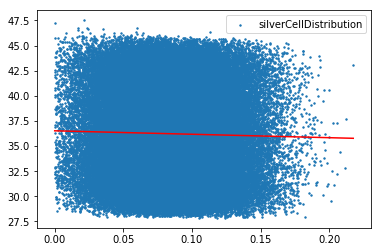

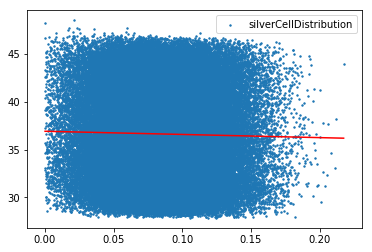

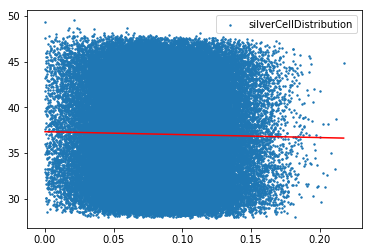

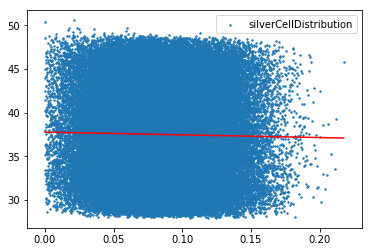

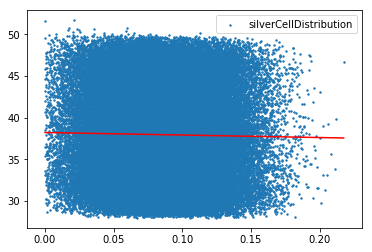

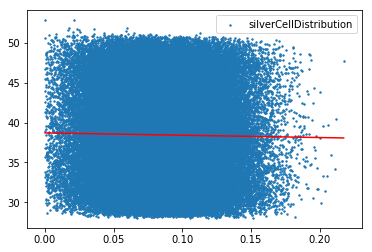

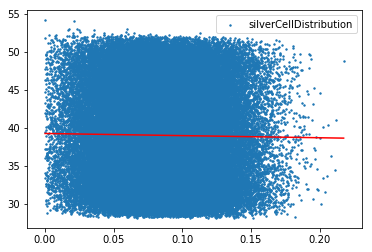

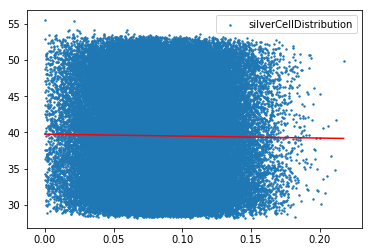

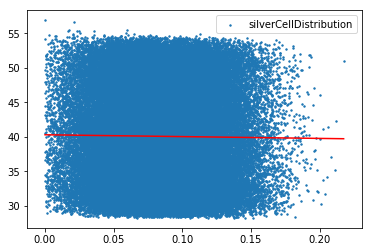

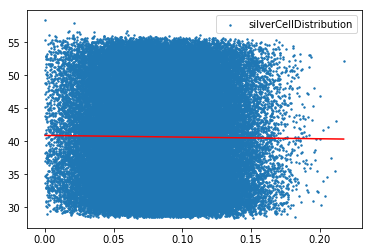

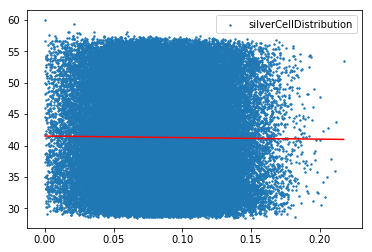

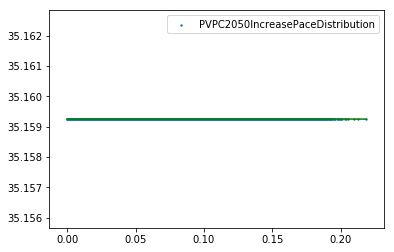

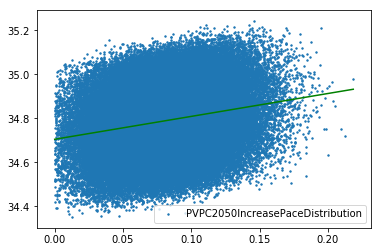

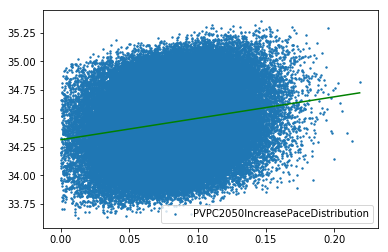

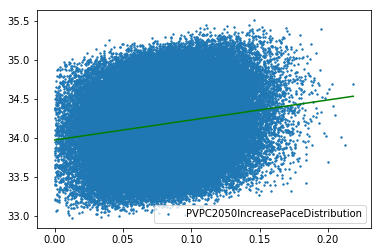

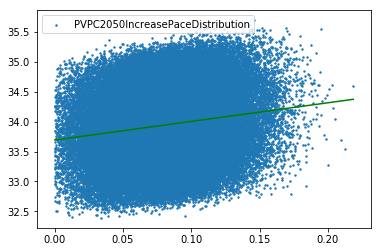

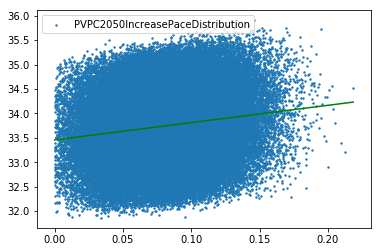

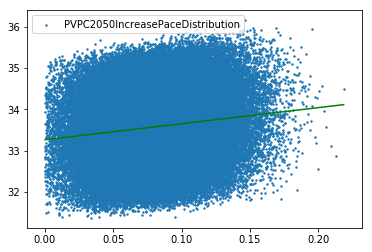

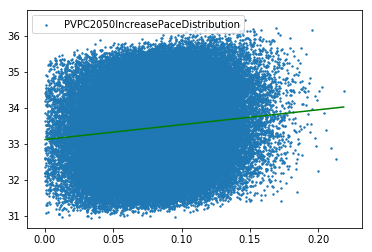

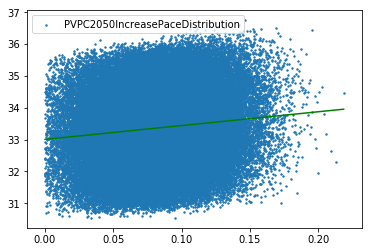

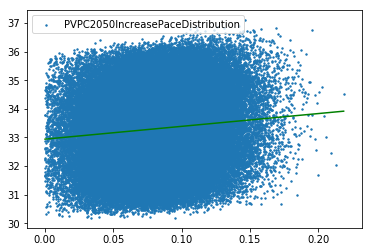

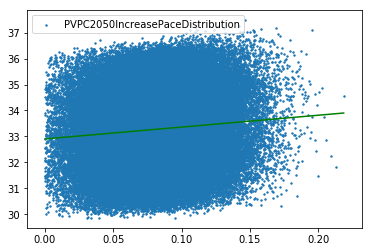

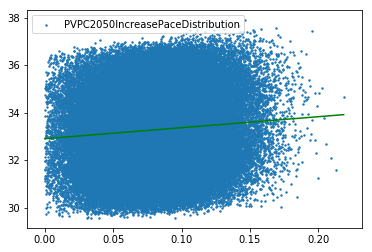

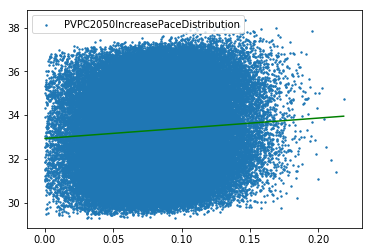

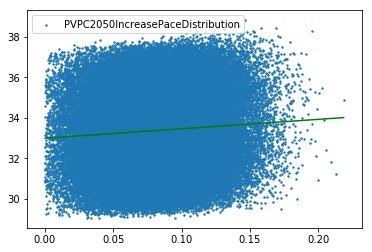

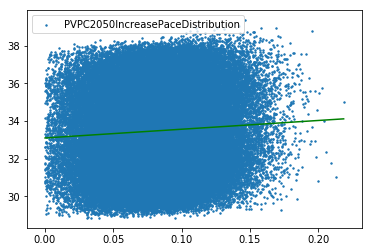

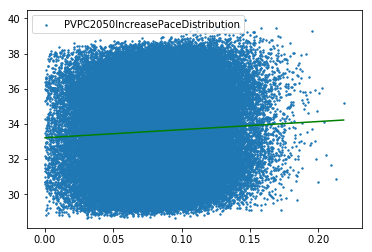

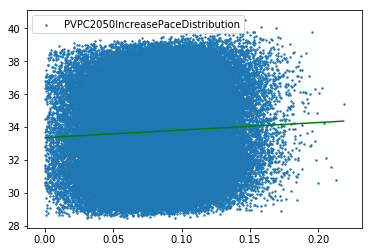

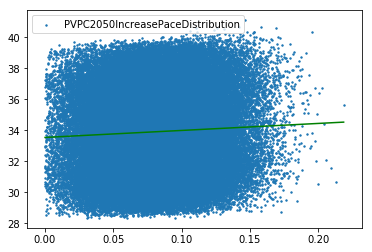

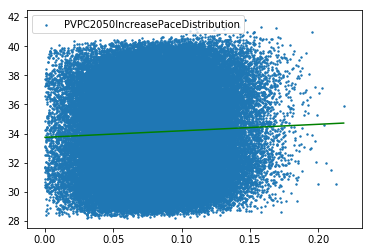

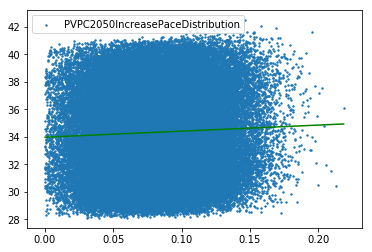

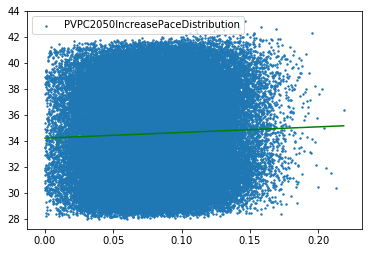

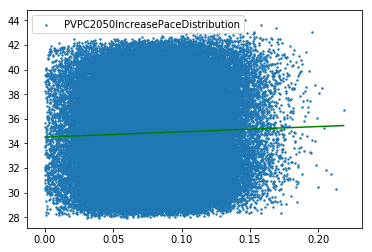

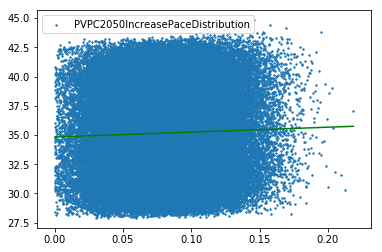

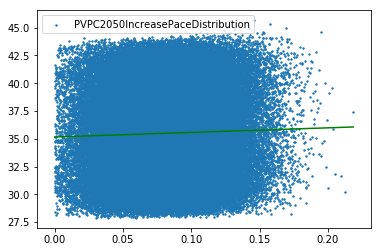

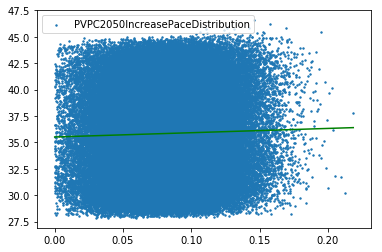

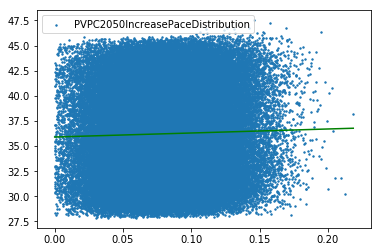

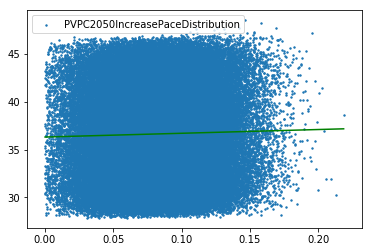

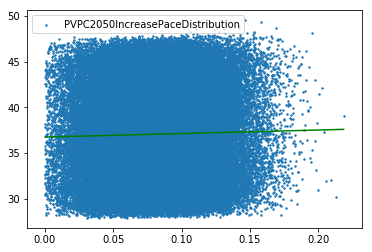

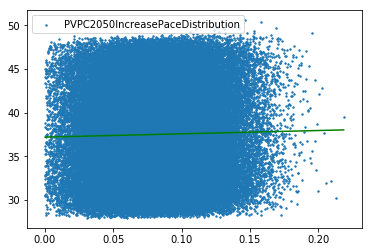

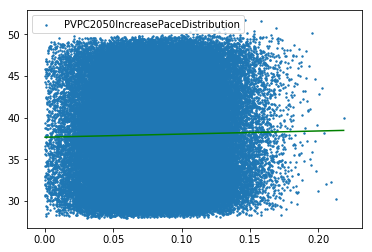

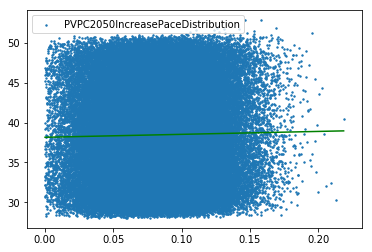

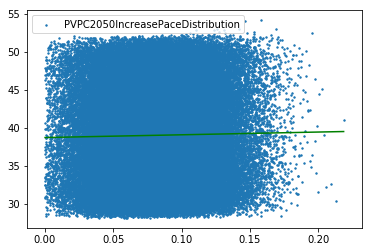

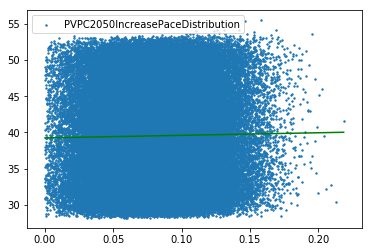

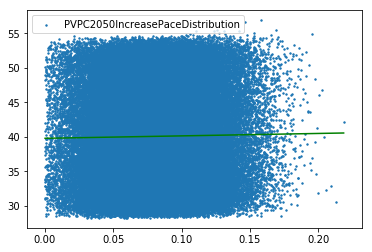

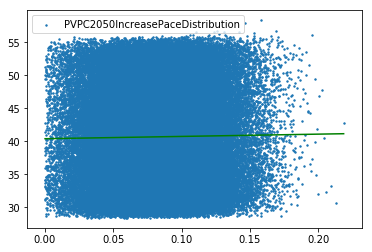

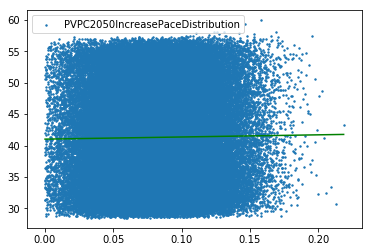

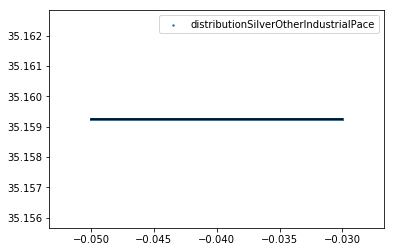

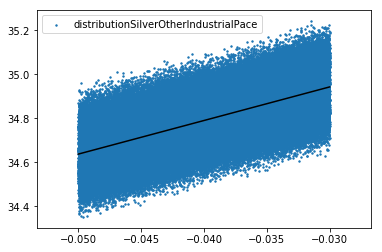

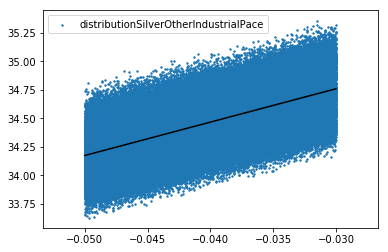

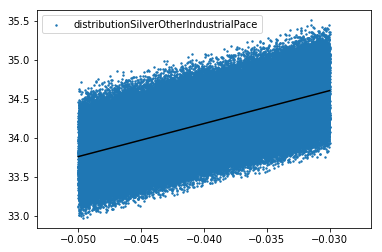

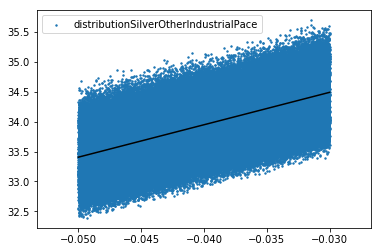

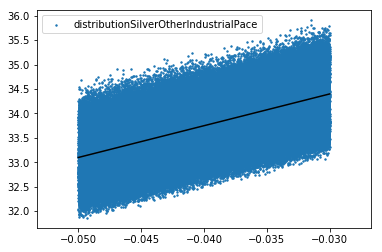

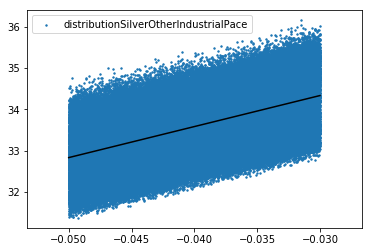

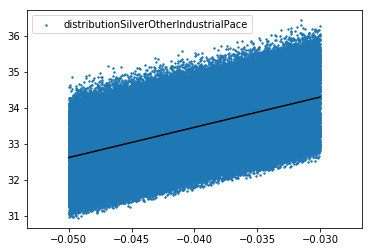

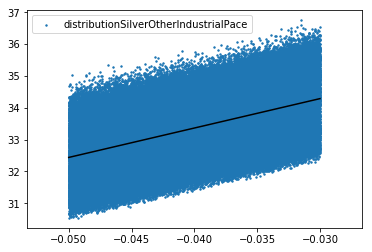

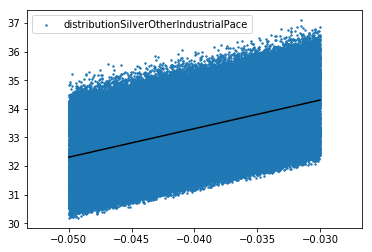

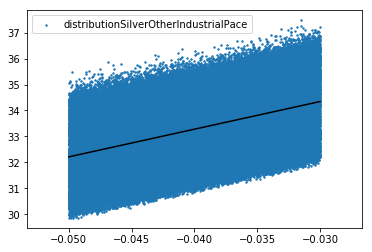

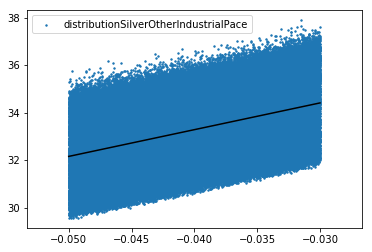

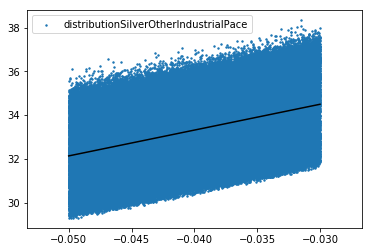

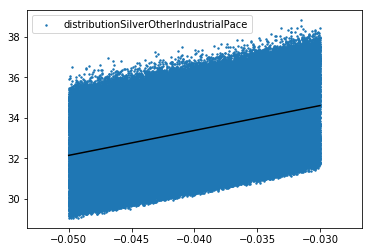

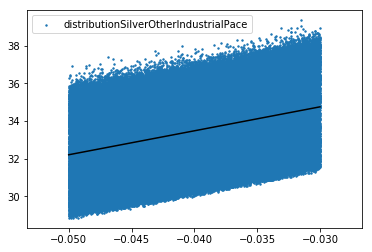

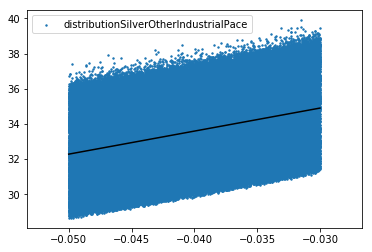

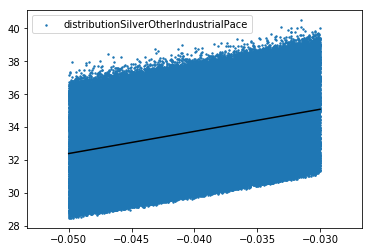

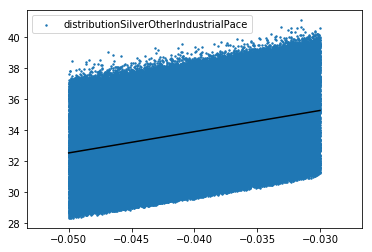

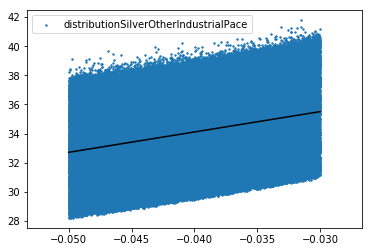

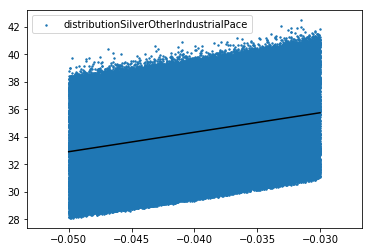

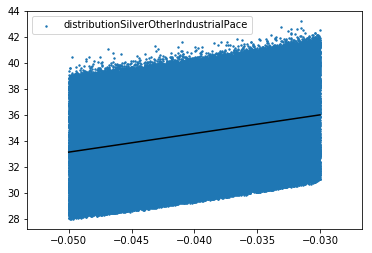

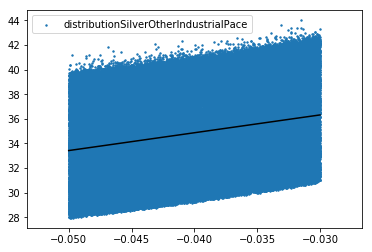

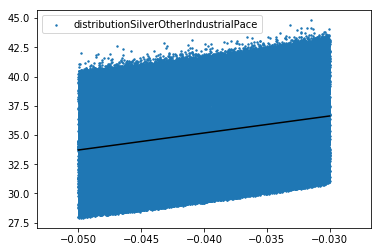

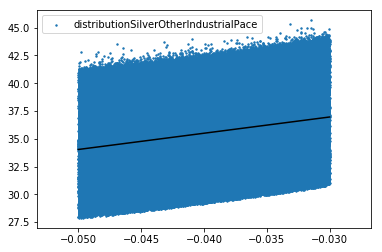

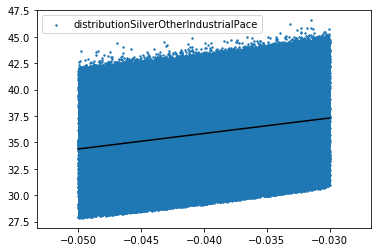

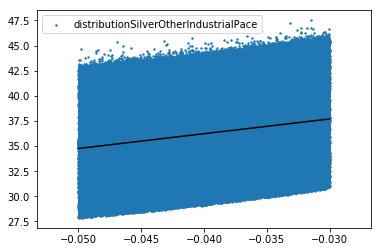

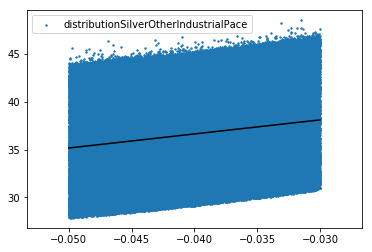

In [ ]:
# Uncertainty analysis
for i in range(len(relativeYear)):
    yearlySilver = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPace*i)
    
    plt.scatter(silverCellDistribution,yearlySilver, s=2, label = 'silverCellDistribution')
    plt.legend()
    plt.plot(np.unique(silverCellDistribution), np.poly1d(np.polyfit(silverCellDistribution, yearlySilver, 1))(np.unique(silverCellDistribution)), color='r')
    plt.show()
    
for i in range(len(relativeYear)):
    yearlySilver = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPace*i)
    
    plt.scatter(PVPC2050IncreasePaceDistribution,yearlySilver, s=2, label = 'PVPC2050IncreasePaceDistribution')
    plt.legend()
    plt.plot(np.unique(PVPC2050IncreasePaceDistribution), np.poly1d(np.polyfit(PVPC2050IncreasePaceDistribution, yearlySilver, 1))(np.unique(PVPC2050IncreasePaceDistribution)), color='g')
    plt.show()
    
for i in range(len(relativeYear)):
    yearlySilver = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPace*i)    
    
    plt.scatter(distributionSilverOtherIndustrialPace,yearlySilver, s=2, label = 'distributionSilverOtherIndustrialPace')
    plt.legend()
    plt.plot(np.unique(distributionSilverOtherIndustrialPace), np.poly1d(np.polyfit(distributionSilverOtherIndustrialPace, yearlySilver, 1))(np.unique(distributionSilverOtherIndustrialPace)), color='k')
    plt.show()
 
for i in range(len(relativeYear)):
    yearlySilver = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPace*i)
    
    plt.scatter(distributionSilverNonIndustrialPace,yearlySilver, s=2, label = 'distributionSilverNonIndustrialPace')
    plt.legend()
    plt.plot(np.unique(distributionSilverNonIndustrialPace), np.poly1d(np.polyfit(distributionSilverNonIndustrialPace, yearlySilver, 1))(np.unique(distributionSilverNonIndustrialPace)), color='w')
    plt.show()

The global sensitivity analysis allows for a precise quantification of the trend already illustrated by the scatter plot in qualitative terms. It is allowed to compute first order terms along with higher order ones that represent the variable influence on the uncertainty output through mutual interactions (e.g. the combined effect of the uncetainty in silver paste use and PV power capacity deployment).

In [ ]:
# Sensitivity Analysis
for i in range(len(relativeYear)):
    yearlySilver = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPace*i)
    
    yearlySilverB = (ITRPV2016silverCell2015 * np.exp(-silverCellDistributionB*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistributionB*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPaceB*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPaceB*i)
    
    yearlySilverAB1 = (ITRPV2016silverCell2015 * np.exp(-silverCellDistributionB*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPace*i)
    
    yearlySilverAB2 = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistributionB*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPace*i)
    
    yearlySilverAB3 = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPaceB*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPace*i)
    
    yearlySilverAB4 = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPaceB*i)
    
    yearlySilverBA1 = (ITRPV2016silverCell2015 * np.exp(-silverCellDistribution*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistributionB*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPaceB*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPaceB*i)
    
    yearlySilverBA2 = (ITRPV2016silverCell2015 * np.exp(-silverCellDistributionB*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistribution*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPaceB*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPaceB*i)
   
    yearlySilverBA3 = (ITRPV2016silverCell2015 * np.exp(-silverCellDistributionB*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistributionB*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPace*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPaceB*i)
    
    yearlySilverBA4 = (ITRPV2016silverCell2015 * np.exp(-silverCellDistributionB*i)/(PVCellEfficiency2015 * np.exp(PVCellEfficiencyIncreasePace*i)))* \
    PVPC2015 * np.exp(PVPC2050IncreasePaceDistributionB*i)/1000 + silverOtherIndustrial2015 * np.exp(distributionSilverOtherIndustrialPaceB*i) + \
    silverNonIndustrial2015 * np.exp(distributionSilverNonIndustrialPace*i)
    
    EyearlySilver=np.average(yearlySilver)
    E2yearlySilver=np.square(np.average(yearlySilver))
    EyearlySilver2=np.average(np.square(yearlySilver))
    Variance = EyearlySilver2 - E2yearlySilver
    
    VsilverCell = np.average(yearlySilver*yearlySilverBA1) - E2yearlySilver
    SsilverCell = VsilverCell/Variance
    
    VTsilverCell = Variance - np.average(yearlySilver*yearlySilverAB1) + E2yearlySilver
    STsilverCell = VTsilverCell/Variance
    
    SsilverCell_PVPC2050 = STsilverCell-SsilverCell
    
    VsilverPC2050 = np.average(yearlySilver*yearlySilverBA2) - E2yearlySilver
    SsilverPC2050 = VsilverPC2050/Variance
    
    VTPC2050 = Variance - np.average(yearlySilver*yearlySilverAB2) + E2yearlySilver
    STPC2050 = VTPC2050/Variance
    
    SPC2050_silverCell = STPC2050 - SsilverPC2050
    
    VsilverOtherIndustrial = np.average(yearlySilver*yearlySilverBA3) - E2yearlySilver
    SsilverOtherIndustrial = VsilverOtherIndustrial/Variance
    
    VsilverNonIndustrial = np.average(yearlySilver*yearlySilverBA4) - E2yearlySilver
    SsilverNonIndustrial = VsilverNonIndustrial/Variance
    
    SfirstOrder = SsilverCell + SsilverPC2050 + SsilverOtherIndustrial + SsilverNonIndustrial
    
    plt.plot(i+2015, SsilverCell, marker = 'o', c = 'r', label = 'SsilverCell' if i == 0 else "")
    plt.plot(i+2015, SsilverPC2050, marker = 'v', c = 'b', label = 'SsilverPC2050' if i == 0 else "")
    plt.plot(i+2015, SsilverOtherIndustrial, marker = 'p', c = 'g', label = 'SsilverOtherIndustrial' if i == 0 else "")
    plt.plot(i+2015, SsilverNonIndustrial, marker = 'h', c = 'k', label = 'SsilverNonIndustrial' if i == 0 else "")
    plt.plot(i+2015, SfirstOrder, marker = 's', c = 'c', label = 'Ssilverfirstorder' if i == 0 else "")
    plt.plot(i+2015, STsilverCell, marker = '^', c = 'm', label = 'STsilverCell_PVPC2050' if i == 0 else "")
    plt.ylim(-0.1,1.2)
    plt.xlim(2016,2051)
    plt.legend(loc=7,prop={'size':16})
plt.show()